# US Baby Names
- NationalNames.csv
- Id: 행 구분자
- Name: 유아 이름
- Year: 출생연도
- Gender: 성별
- Count: 해당 (이름, 연도, 성별)의 출생횟수

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

- 1. 각 (연도, 성별) 그룹의 총 출생횟수 산출하기

In [3]:
df_names = pd.read_csv("data/us-baby-names/NationalNames.csv", sep=",",
                     header=0, names=["id", "name", "year", "sex", "births"])
df_names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
df_total_births = df_names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [5]:
df_total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<IPython.core.display.Javascript object>


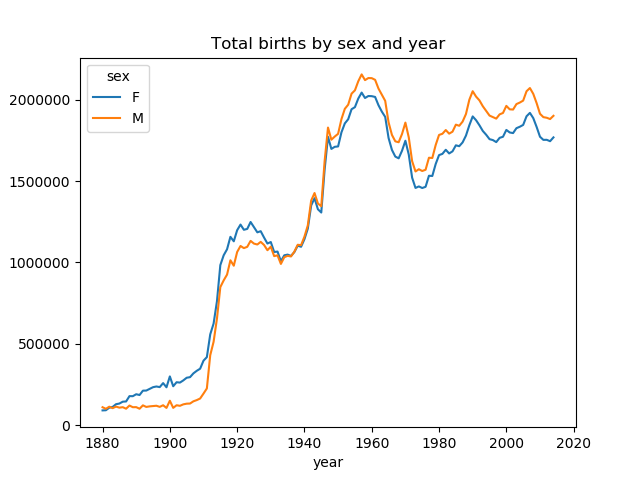

Text(0.5,1,'Total births by sex and year')

In [6]:
gp_ax = df_total_births.plot()
gp_ax.set_title("Total births by sex and year")

- 2.각 (연도, 성별) 그룹 내에서 각 이름의 출생횟수가 전체에서 차지하는 비중(%)을 나타내는 열 추가하기

In [28]:
df_names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [8]:
dict_grouped_names = dict(list(df_names.groupby(["year", "sex"])))

In [10]:
dict_grouped_names.keys()

dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [11]:
df_grouped_sample = dict_grouped_names[(2011, 'M')]
df_grouped_sample.head(10)

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [29]:
def add_prop(df_agg):
    agg_births = df_agg["births"]
    df_agg["prop"] = agg_births / agg_births.sum()
    return df_agg

In [30]:
df_names_with_prop = df_names.groupby(["year", "sex"]).apply(add_prop)
df_names_with_prop.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


- 3.각 (연도, 성별) 그룹 내 출생횟수 기준 TOP 1000 이름 추출하기

In [14]:
dict_grouped_names_with_prop = dict(list(df_names_with_prop.groupby(["year", "sex"])))

In [17]:
df_grouped_sample = dict_grouped_names_with_prop[(2011, 'M')]

In [18]:
df_grouped_sample.sort_values(by="births", ascending=False).iloc[:10]

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [19]:
def get_top1000(agg_df):
    df_top1000 = agg_df.sort_values(by="births", ascending=False).iloc[:1000]
    return df_top1000

In [21]:
df_top1000_names = df_names_with_prop.groupby(["year", "sex"]).apply(get_top1000)

In [23]:
df_top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [25]:
df_names_with_prop.loc[(df_names_with_prop['year'] == 2011) & (df_names_with_prop['sex'] == 'M')].shape

(14329, 6)

In [26]:
df_top1000_names.loc[(2011,'M')].shape

(1000, 6)

- 4.각 연도에 따른 전체 출생횟수 대비 TOP 1000 이름들의 출생횟수 비중 산출하기

In [31]:
df_top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [32]:
df_top1000_props = df_top1000_names.pivot_table("prop", index="year", columns="sex", aggfunc=sum)

C:\Users\tkim25\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\tkim25\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [33]:
df_top1000_props.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


<IPython.core.display.Javascript object>


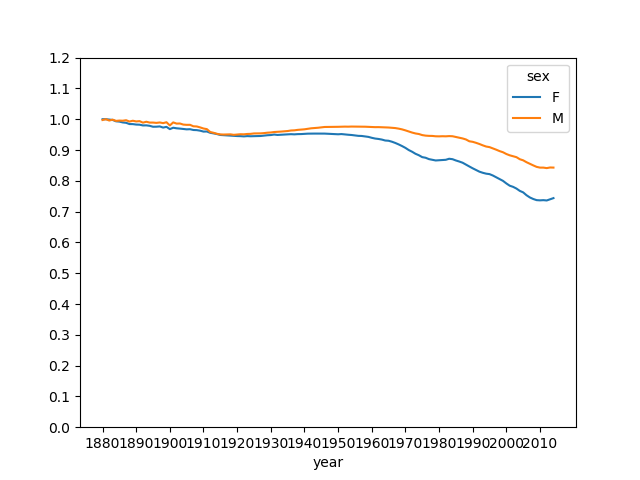

In [35]:
ax_top_props = df_top1000_props.plot()

In [39]:
ax_top_props.set_xticks(range(1880, 2020, 10))
ax_top_props.set_yticks(np.arange(0, 1.3, 0.1))

- 5.특정 이름들의 연도에 따른 출생횟수 변화 추이 분석하기

In [40]:
df_top1000_names.head()

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188

In [41]:
df_top_names_births = df_top1000_names.pivot_table("births", index="year",columns="name", aggfunc=sum)

C:\Users\tkim25\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [43]:
df_top_names_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [47]:
df_top_names_births_subset = df_top_names_births[["John", "Harry", "Mary", "Marilyn"]]

In [48]:
type(df_top_names_births_subset)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>


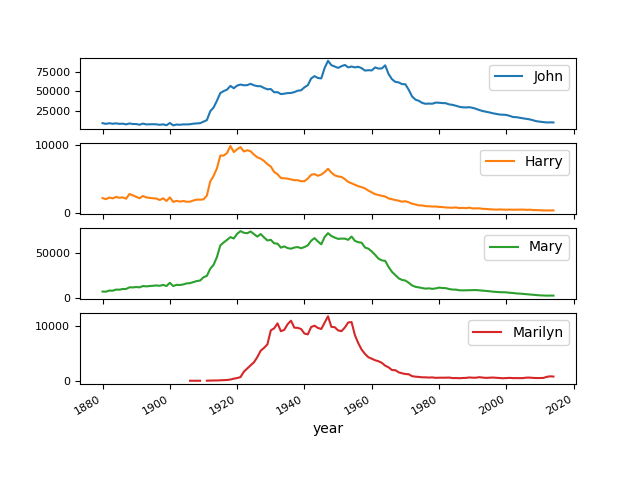

In [49]:
gf_ax_top_names = df_top_names_births_subset.plot(subplots=True, fontsize=8)

- 6.남아 이름의 마지막 글자가 연도에 따라 어떻게 변화하였는지 분석하기

get_last_letter = lambda x: x[-1]
names["last_letters"] = names["name"].apply(get_last_letter)
last_letters_table = names.pivot_table("births", index="last_letters",
                                       columns=["sex", "year"], aggfunc=sum)

In [ ]:
three_years_subtable = last_letters_table.reindex(columns=[1910, 1960, 2010], level="year")
three_years_letters_prop = three_years_subtable / three_years_subtable.sum()

In [ ]:
fig, axes = plt.subplots(2, 1)
three_years_letters_prop["M"].plot(kind="bar", ax=axes[0], title="Male")
three_years_letters_prop["F"].plot(kind="bar", ax=axes[1], title="Female", legend=False)
plt.tight_layout()

In [ ]:
letters_prop = last_letters_table / last_letters_table.sum()
dny_prop = letters_prop.loc[["d", "n", "y"], "M"]
dny_prop.transpose().plot()